In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from plots import plot_cvar, plot_cvar_groups_with_markers

# colors

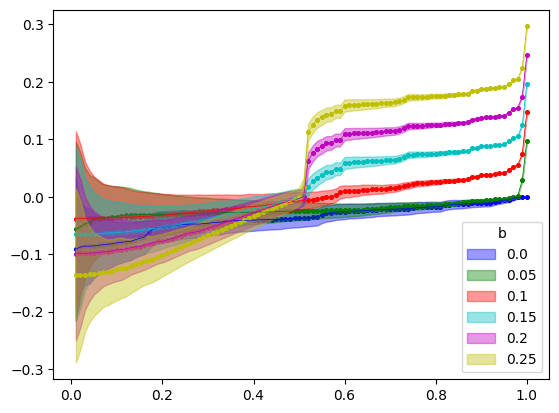

In [36]:
from utils import rearrange_cvar
g1=pd.read_csv("../data/g1_bbound_mate.csv")

# Parametros
data = g1.copy()
x = "p"
y = "CVaR"
group = "b"
cvar_se = "CVaR.se"
zz = 1.64
sx = 7
lw = 0.5
colors=[
        "b",
        "g",
        "r",
        "c",
        "m",
        "y",
        "k",
        # "w",
        "#FF5733",
        "#33FF57",
        "#5733FF",
        "#33FFFF",
        "#FF33FF",
        "#FFFF33",
        "#333333",
    ]

rearrangement=True

# Cuerpo de la funcion
for i, (g, group_df) in enumerate(data.groupby(group)):
    if rearrangement:
        group_df[y] = rearrange_cvar(group_df[y])
    group_df["ymin"] = group_df[y] - zz * group_df[cvar_se]
    group_df["ymax"] = group_df[y] + zz * group_df[cvar_se]
    plt.scatter(
        group_df[x], group_df[y], color=colors[i]
        , s = sx
    )
    plt.plot(
        group_df[x], group_df[y], color = colors[i],
        linewidth = lw
    )
    plt.fill_between(
        group_df[x], group_df["ymin"], group_df['ymax'],
        alpha = 0.4, color = colors[i], label = g
    )
plt.legend(title = group)
plt.show()
## final de la funcion

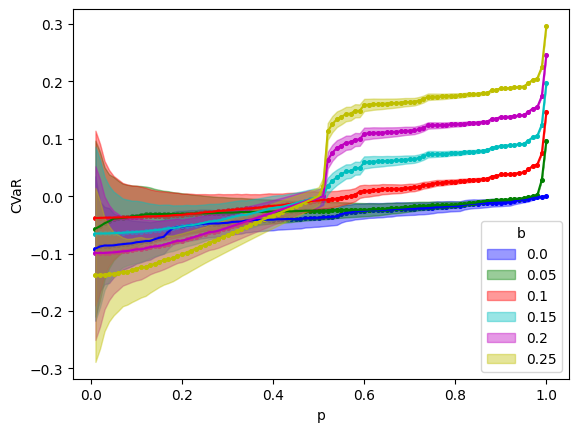

In [46]:

def plot_cvar_group(data, x="p", y="CVaR", group="b", cvar_se="CVaR.se", zz=1.64, sx=7, lw=0.5, colors=None, rearrangement=True):
    """
    Función para graficar datos agrupados por una columna específica.

    Parámetros:
    - data: DataFrame de Pandas con los datos.
    - x: Nombre de la columna para el eje x (por defecto "p").
    - y: Nombre de la columna para el eje y (por defecto "CVaR").
    - group: Nombre de la columna por la cual agrupar los datos (por defecto "b").
    - cvar_se: Nombre de la columna para el error estándar de CVaR (por defecto "CVaR.se").
    - zz: Valor para calcular los límites de error (por defecto 1.64).
    - sx: Tamaño de los puntos en el scatter plot (por defecto 7).
    - lw: Ancho de línea en el plot (por defecto 0.5).
    - colors: Lista de colores a utilizar para cada grupo (opcional).
    - rearrangement: Booleano para indicar si se debe reorganizar los datos de CVaR (por defecto True).

    """
    if colors is None:
        colors = [
            "b", "g", "r", "c", "m", "y", "k", "#FF5733", "#33FF57",
            "#5733FF", "#33FFFF", "#FF33FF", "#FFFF33", "#333333"
        ]

    for i, (g, group_df) in enumerate(data.groupby(group)):
        if rearrangement:
            group_df[y] = rearrange_cvar(group_df[y])
        group_df["ymin"] = group_df[y] - zz * group_df[cvar_se]
        group_df["ymax"] = group_df[y] + zz * group_df[cvar_se]
        
        plt.scatter(
            group_df[x], group_df[y], color=colors[i], s=sx,
            # label=f"{g} Scatter" if i == 0 else None  # Etiqueta solo en la primera iteración
        )
        plt.plot(
            group_df[x], group_df[y], color=colors[i],
            # linewidth=lw, label=f"{g} Line" if i == 0 else None  # Etiqueta solo en la primera iteración
        )
        plt.fill_between(
            group_df[x], group_df["ymin"], group_df['ymax'],
            alpha=0.4, color=colors[i], label=g  # Etiqueta solo en la primera iteración
        )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=group)
    plt.show()
plot_cvar_group(g1)

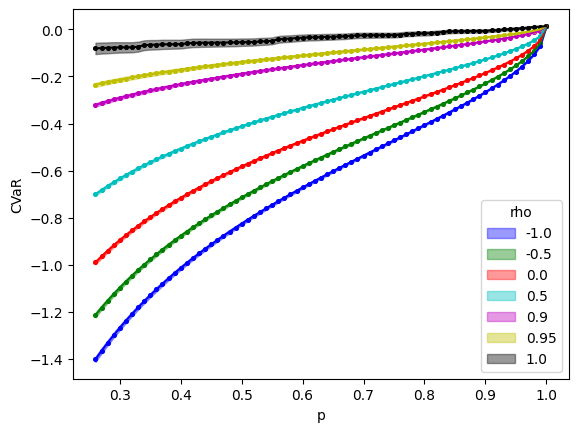

In [47]:
g3 = pd.read_csv("../data/g3_sbound_mate.csv")
g3.head(3)
plot_cvar_group(g3, group='rho')

# markers y colors

In [2]:
g1 = pd.read_csv("../data/g2_bbound.csv")
# bs = g1['b'].unique()
# plt.scatter("p", "CVaR", data = g1)
g1.head()
g1['y_max'] = g1['CVaR'] + 0.01
g1['y_min'] = g1['CVaR'] - 0.01
# g1['y_max'] = g1['CVaR'] + 0.01

In [3]:
g1.head()

,CVaR,CVaR.se,p,b,Type,y_max,y_min
0,-0.090880,0.076688,0.01,NaN,CATE-CVaR,-0.080880,-0.100880
1,-0.087216,0.047558,0.02,NaN,CATE-CVaR,-0.077216,-0.097216
2,-0.086286,0.040994,0.03,NaN,CATE-CVaR,-0.076286,-0.096286
3,-0.085866,0.039832,0.04,NaN,CATE-CVaR,-0.075866,-0.095866
4,-0.085489,0.033913,0.05,NaN,CATE-CVaR,-0.075489,-0.095489


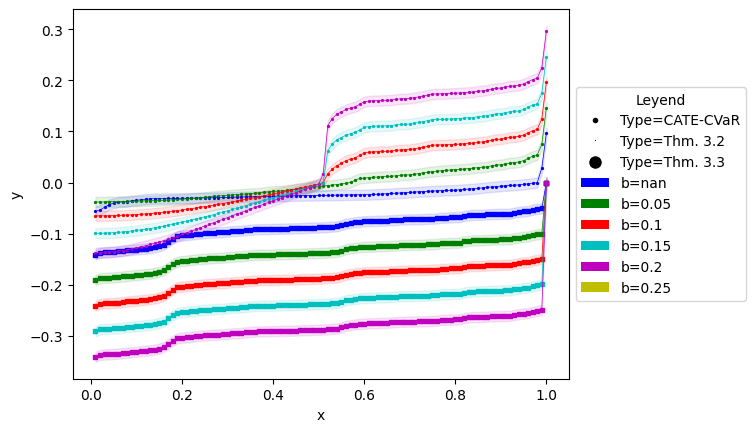

In [4]:
plot_cvar_groups_with_markers(
    g1, 
    "p",
    "CVaR",
    # sx = 10,
    # lw=0.5
)

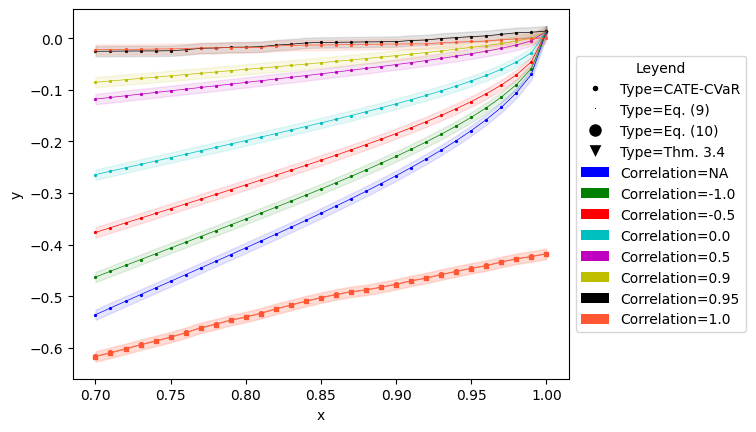

In [6]:
g1 = pd.read_csv("../data/g4_condvar_bb.csv")
g1 = g1.fillna("NA")
# bs = g1['b'].unique()
# plt.scatter("p", "CVaR", data = g1)
g1.head()
g1['y_max'] = g1['CVaR'] + 0.01
g1['y_min'] = g1['CVaR'] - 0.01
plot_cvar_groups_with_markers(
    g1, 
    "p",
    "CVaR",
    main_group="Correlation"
    # sx = 10,
    # lw=0.5
)